Part 1: Classification metrics using scikit-learn

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, cohen_kappa_score

df = pd.read_csv('nbaallelo_log.csv')

X = df[['elo_i']]
y = df['game_result'].map({'W': 1, 'L': 0})

random_state = int(input("Enter a random state: "))
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)

# Print the results
print("Confusion matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"Kappa: {kappa:.3f}")


Confusion matrix:
[[9166 6683]
 [6053 9677]]
Accuracy: 0.597
Precision: 0.592
Recall: 0.615
Kappa: 0.193


Part 2: Regression metrics using scikit-learn

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

diamonds = pd.read_csv('diamonds.csv')

X = diamonds[['carat', 'table']]
y = diamonds['price']

random_state = int(input("Enter a random state: "))
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f'MAE: {mae:.3f}')
print(f'MSE: {mse:.3f}')
print(f'RMSE: {rmse:.3f}')
print(f'R-squared: {r_squared:.3f}')


MAE: 996.337
MSE: 2416649.831
RMSE: 1554.558
R-squared: 0.850


Part 3: Evaluating models using plots in scikit-learn

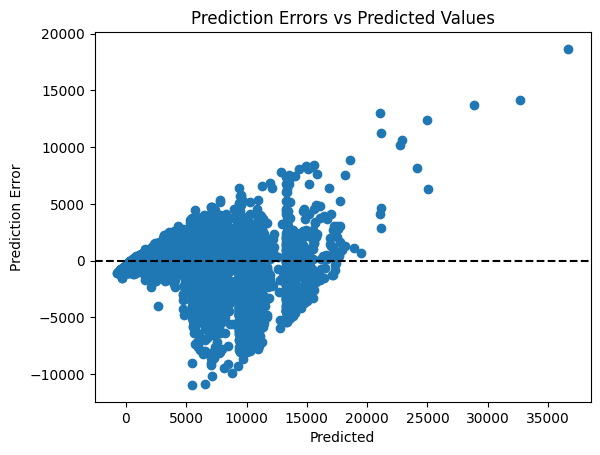

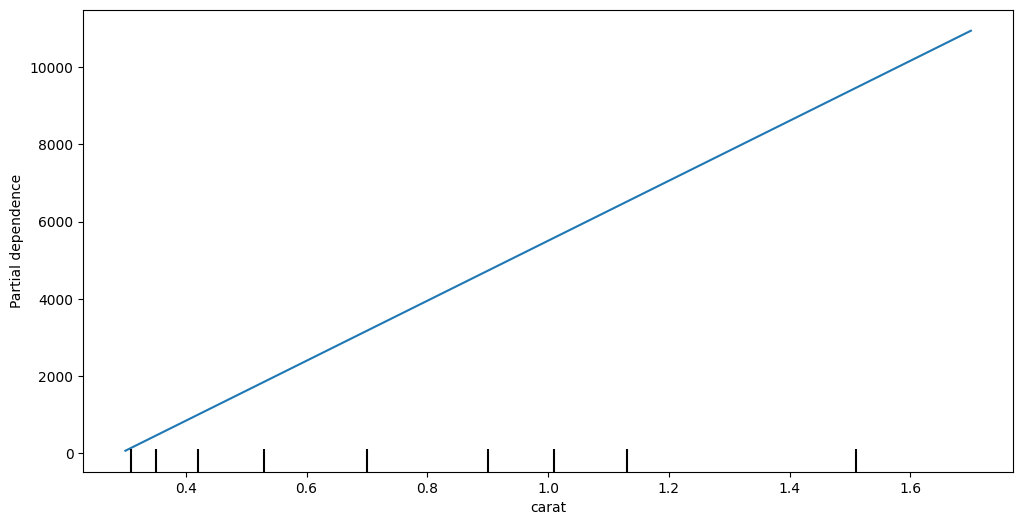

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.inspection import PartialDependenceDisplay

diamonds = pd.read_csv("diamonds.csv")
# print(diamonds.head())

features = input("Please enter the feature column names for the X axis, separated by spaces, the options are: carat, depth, table, x, y, z ").split()
X = diamonds[[col.strip() for col in features]]
y = diamonds['price']

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

prediction_errors = y_pred - y_test

plt.scatter(y_pred, prediction_errors)
plt.xlabel('Predicted')
plt.ylabel('Prediction Error')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Prediction Errors vs Predicted Values')
plt.show()

fig, ax = plt.subplots(figsize=(12, 6))
PartialDependenceDisplay.from_estimator(model, X_train, [col.strip() for col in features], ax=ax)
plt.show()